## EDA --> Exploratory Data Analysis
### Data Loading
### Data Understanding --> Data Dictionary (Reference Document contains columns description)
### Segmentation of column (Optional)
### Missing Value Check
### Outlier Check
### Analysis
##### Univariate Analysis
##### Bivariate Analysis

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings 
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
df=pd.read_csv("day.csv")

In [3]:
df.head()
# Bike Demand data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Dictionary

In [ ]:
# https://cdn.upgrad.com/uploads/production/0fdfa494-a9bf-4b32-873f-900e3b262948/Readme.txt

 ## Column Segmentation

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
## 730 rows
for i in df.columns:
    print(i,df[i].nunique())

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


In [10]:
cont_cols=["temp","atemp","hum","windspeed","casual","registered","cnt"]# numerical columns (so many unique values)
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]# categories/very few unique values
id_cols=["instant","dteday"]

## Missing Value Check
#### During EDA identification of missing values is mandatory, but imputing not

In [15]:
100*df.isnull().mean()
## No Missing Values no imputation

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Outlier Treatment
#### Capping at upper bound and flooring at lower bound is one of the approach (majorly used in industry)
#### During EDA identification of outlier is mandatory, but treatment not

temp


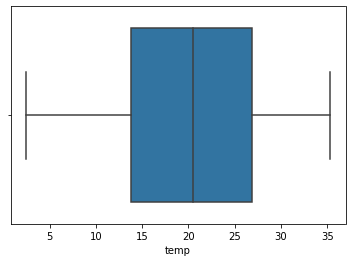

atemp


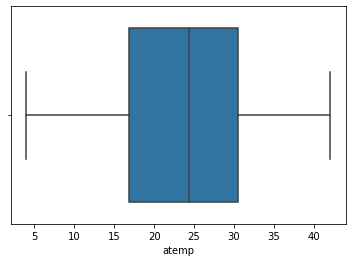

hum


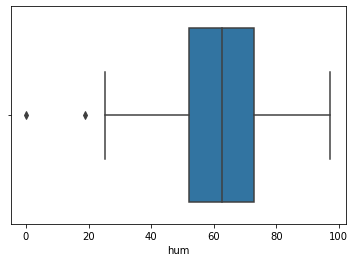

windspeed


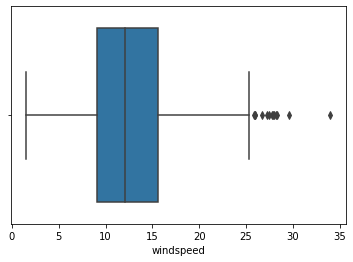

casual


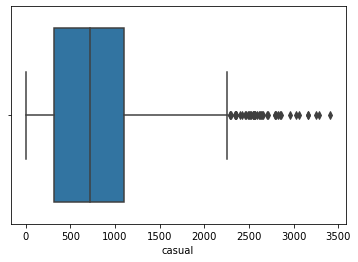

registered


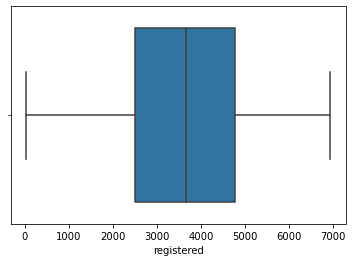

cnt


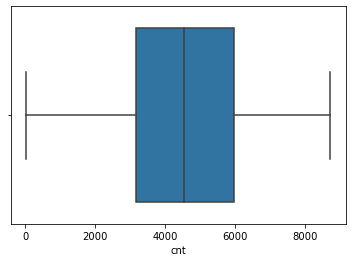

In [18]:
for i in cont_cols:
    sns.boxplot(df[i])
    print(i)
    plt.show()

In [20]:
df["windspeed"].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [21]:
q1=9.041650
q3=15.625589
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

In [23]:
df["windspeed"]=np.where(df["windspeed"]>ub,ub,df["windspeed"])##capping
df["windspeed"]=np.where(df["windspeed"]<lb,lb,df["windspeed"])##flooring

<AxesSubplot:xlabel='windspeed'>

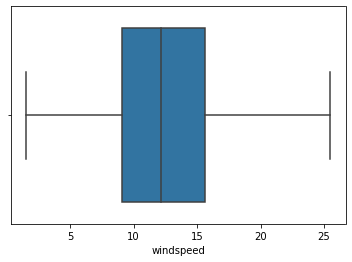

In [24]:
sns.boxplot(df["windspeed"])

## Univariate Analysis
### Uni --> One Variate --> Variable

In [ ]:
## Some Univariate Analysis Example
### 1. Mean
### 2. Median
### 3. Mode
### 4. count
### 5. Count of unique values
### 6. Value_counts()
### 7. Distribution check
### 8. Count of missing values
### 9. Minimum
### 10. Maximum etc etc etc...

## Graph Based Univariate Analysis

In [30]:
## Histplot --> Binwise distibution of a continuous variable
## Distplot --> Distribution plot of a continuous variable
## Countplot -->frequency distibution of a categorical variable
## boxplot --> As discussed above

<AxesSubplot:xlabel='temp', ylabel='Count'>

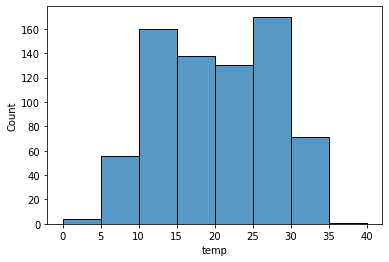

In [26]:
sns.histplot(df["temp"],bins=[0,5,10,15,20,25,30,35,40])

temp


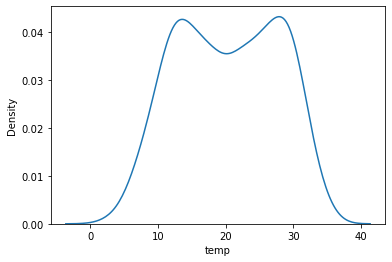

atemp


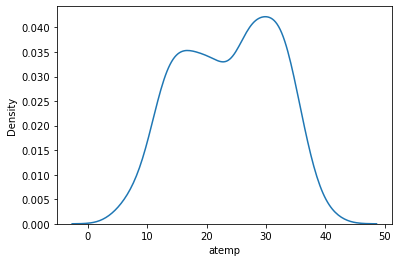

hum


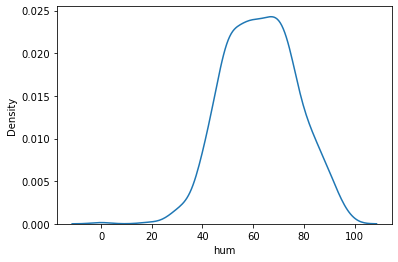

windspeed


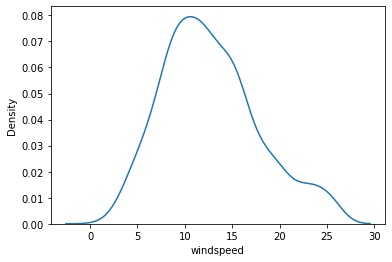

casual


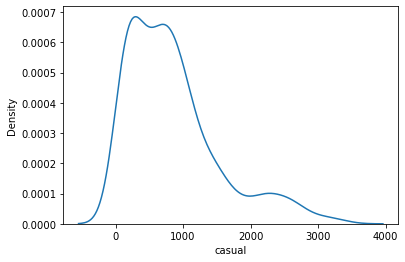

registered


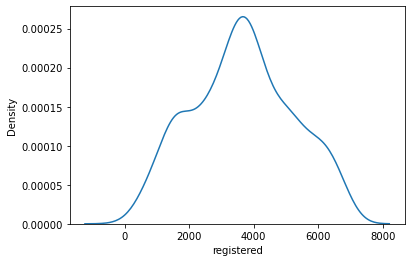

cnt


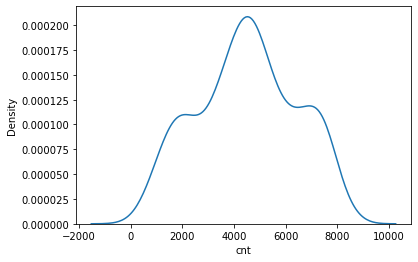

In [33]:
for i in cont_cols:
    print(i)
    sns.distplot(df[i],hist=False)
    plt.show()
## approximate curve plotted on top of histrogram

season


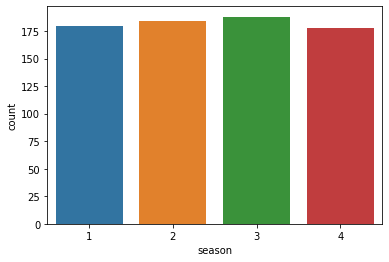

yr


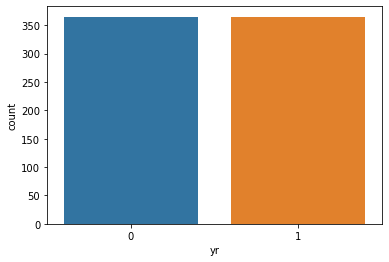

mnth


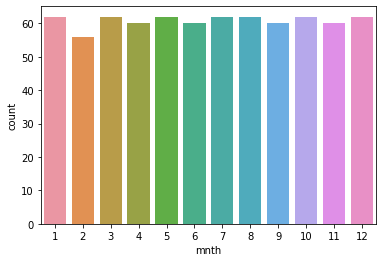

holiday


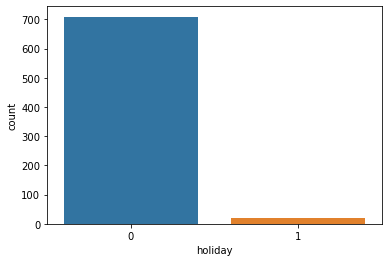

weekday


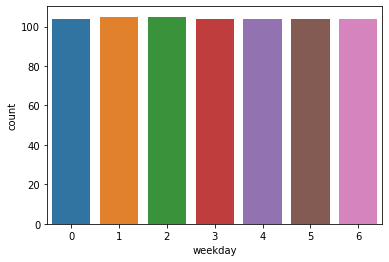

workingday


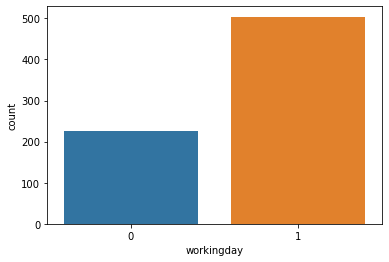

weathersit


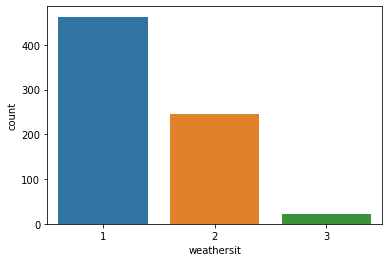

In [29]:
for i in cat_cols:
    print(i)
    sns.countplot(df[i])
    plt.show()

In [28]:
df["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

## Bivariate Analysis
### Bi --> Two Variate --> Variable

## Relationships between two variables
## 1. Scatter plot
## 2. Barplot
## 3. Boxplot
## 4. Correlation
#### -1 to 1 where 
#### 1--> Positive correlation (directly proportional)
#### -1--> Negative correlation (inversely proportional)
#### 0--> No correlation

## Scatter Plot

<AxesSubplot:xlabel='temp', ylabel='cnt'>

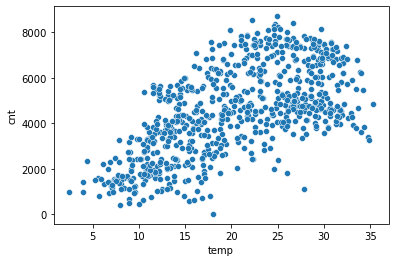

In [34]:
sns.scatterplot(df["temp"],df["cnt"])

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

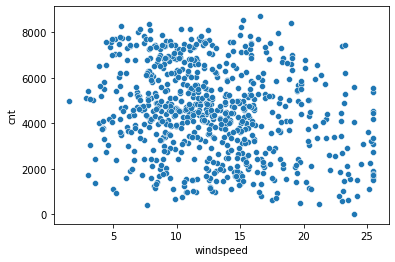

In [35]:
sns.scatterplot(df["windspeed"],df["cnt"])

## Heatmap

<AxesSubplot:>

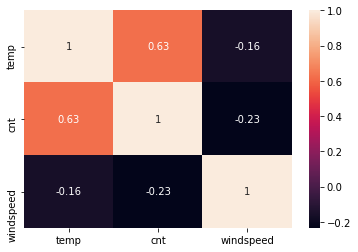

In [40]:
sns.heatmap(df[["temp","cnt","windspeed"]].corr(),annot=True)

## Boxplot

<AxesSubplot:xlabel='mnth', ylabel='temp'>

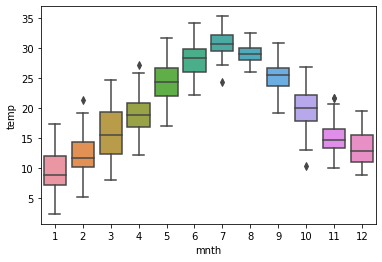

In [41]:
sns.boxplot(x=df["mnth"],y=df["temp"])

## Barplot

<AxesSubplot:xlabel='mnth', ylabel='temp'>

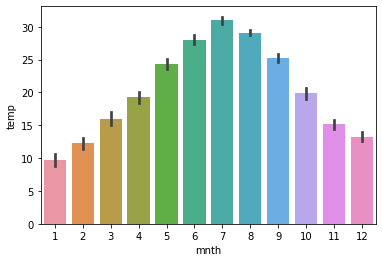

In [42]:
sns.barplot(x=df["mnth"],y=df["temp"])# bydefault barplot mean

<AxesSubplot:xlabel='mnth', ylabel='temp'>

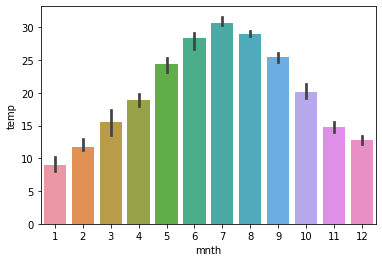

In [43]:
sns.barplot(x=df["mnth"],y=df["temp"],estimator=np.median)

<AxesSubplot:xlabel='mnth', ylabel='temp'>

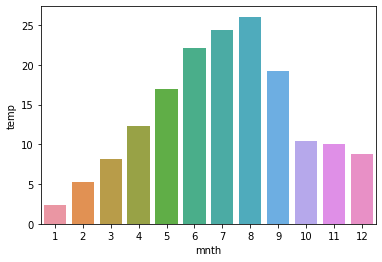

In [45]:
sns.barplot(x=df["mnth"],y=df["temp"],estimator=np.min,ci=None)

## Multivariate

<AxesSubplot:xlabel='mnth', ylabel='temp'>

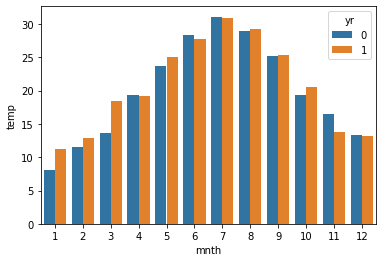

In [46]:
sns.barplot(x=df["mnth"],y=df["temp"],hue=df["yr"],ci=None)# bydefault barplot mean